In [2]:
import pandas as pd
import numpy as np
import sys

sys.path.append("../src")

from utils.data_loader import load_data

In [3]:
# Load the data
df = load_data("../data/raw/data.csv")

Data loaded successfully from ../data/raw/data.csv


1. Overview of the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

2. Summary Statistics 

In [15]:
# Summary stats for numerical columns
numerical_cols = ['Amount', 'Value', 'CountryCode', 'PricingStrategy', 'FraudResult']
print("===== Summary Statistics =====")
print("\nDataFrame Shape:")
print(df.shape)

print("\nDataFrame statitics:\n")
print(df[numerical_cols].describe())

# Additional stats for skewness
print("\nSkewness:")
print(df[numerical_cols].skew())

===== Summary Statistics =====

DataFrame Shape:
(95662, 16)

DataFrame statitics:

             Amount         Value  CountryCode  PricingStrategy   FraudResult
count  9.566200e+04  9.566200e+04      95662.0     95662.000000  95662.000000
mean   6.717846e+03  9.900584e+03        256.0         2.255974      0.002018
std    1.233068e+05  1.231221e+05          0.0         0.732924      0.044872
min   -1.000000e+06  2.000000e+00        256.0         0.000000      0.000000
25%   -5.000000e+01  2.750000e+02        256.0         2.000000      0.000000
50%    1.000000e+03  1.000000e+03        256.0         2.000000      0.000000
75%    2.800000e+03  5.000000e+03        256.0         2.000000      0.000000
max    9.880000e+06  9.880000e+06        256.0         4.000000      1.000000

Skewness:
Amount             51.098490
Value              51.291086
CountryCode         0.000000
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64


3. Distribution of Numerical Features 

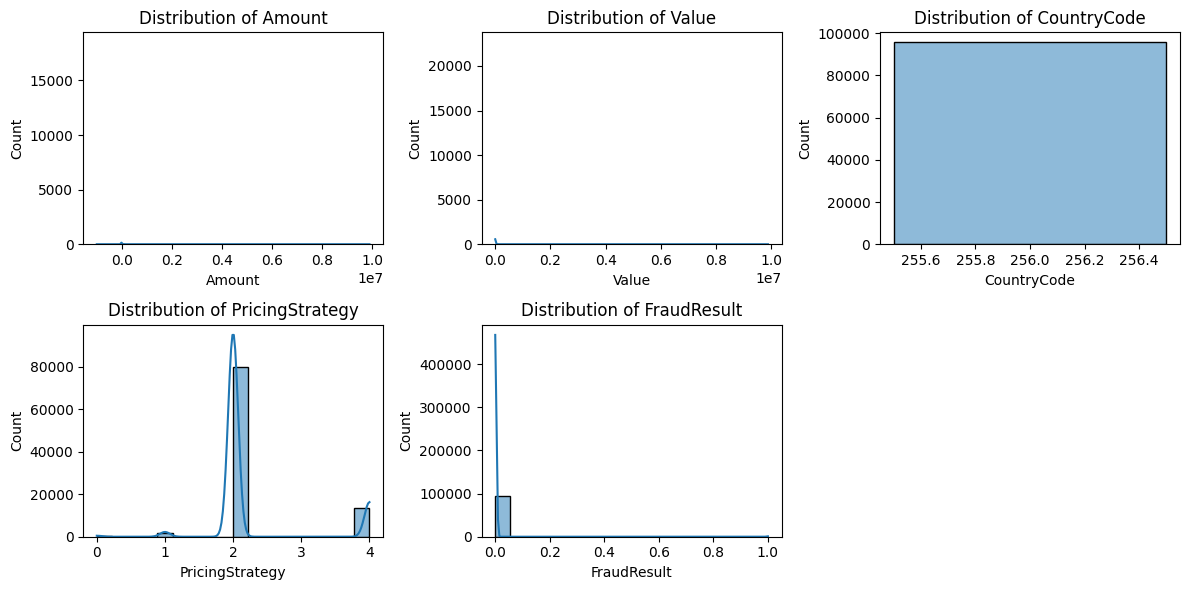

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
plt.figure(figsize=(12, 6))
for col in numerical_cols:
    plt.subplot(2, 3, numerical_cols.index(col) + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



4. Distribution of Categorical Features 

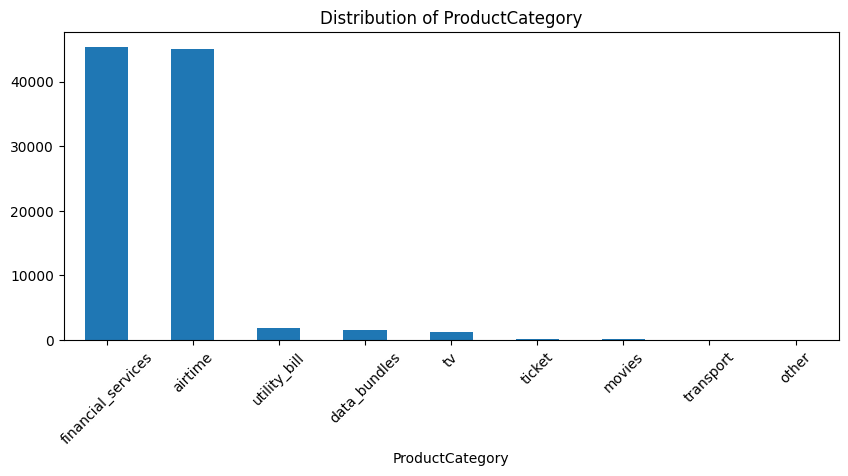

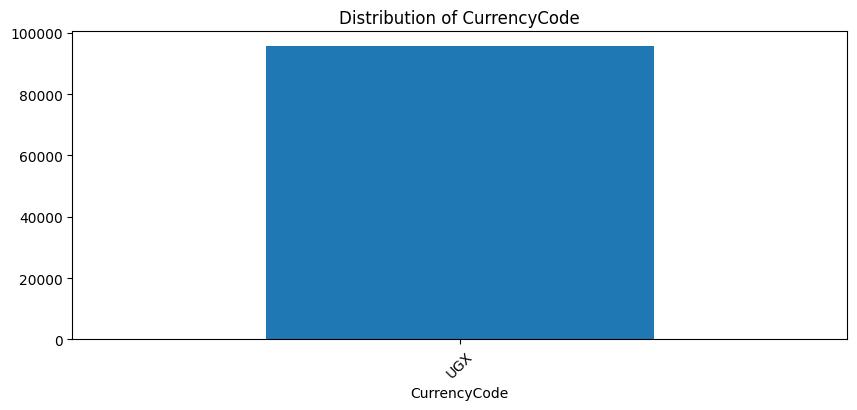

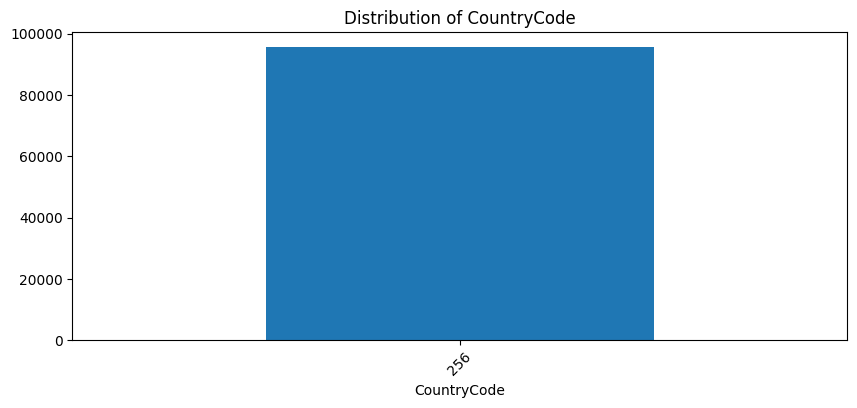

In [8]:
categorical_cols = ['ProductCategory', 'CurrencyCode', 'CountryCode']

# Plot value counts for categorical features
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

5. Correlation Analysis 

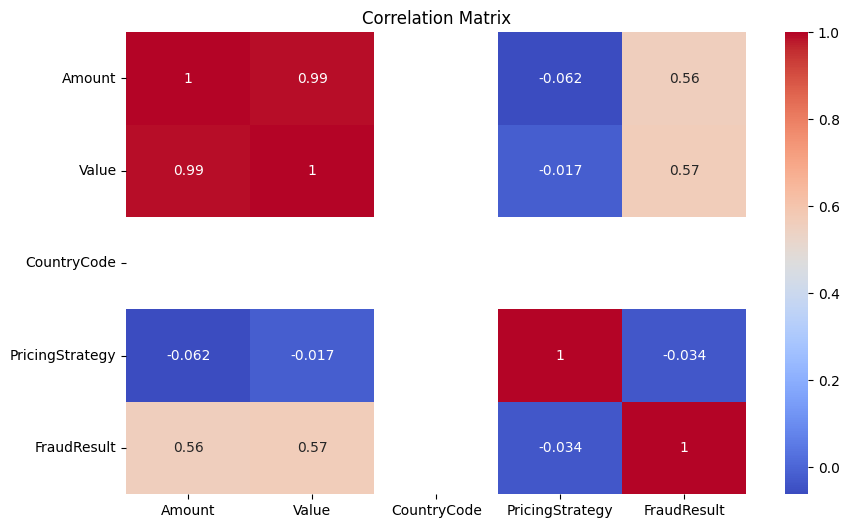

In [9]:
# Correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

6. Identifying Missing Values 

In [10]:
# Already confirmed no missing values, but here's a check:
print("===== Missing Values =====")
print(df.isnull().sum())

===== Missing Values =====
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


7. Outlier Detection 

In [27]:
# Box plots for numerical features (already shown in Step 3)
# Alternative: Z-score analysis for outliers
from scipy import stats
import numpy as np

# Select numerical columns (excluding high-cardinality IDs and categoricals)
numerical_cols = ['Amount', 'Value', 'CountryCode', 'PricingStrategy', 'FraudResult']

# Calculate Z-scores for all numerical features
z_scores = np.abs(stats.zscore(df[numerical_cols]))
outliers = (z_scores > 3)  # Boolean mask

# Print outlier counts per column
print("===== Outliers per Column (Z-score > 3) =====")
for i, col in enumerate(numerical_cols):
    col_outliers = outliers[:, i].sum()
    print(f"{col}: {col_outliers} outliers")

# Optional: Show rows with outliers in ANY column
any_outliers = outliers.any(axis=1)
print(f"\nTotal rows with outliers in any numerical column: {any_outliers.sum()}")

===== Outliers per Column (Z-score > 3) =====
Amount: 269 outliers
Value: 269 outliers
CountryCode: 0 outliers
PricingStrategy: 385 outliers
FraudResult: 193 outliers

Total rows with outliers in any numerical column: 618


C:\Users\user\AppData\Local\Temp\ipykernel_3576\1686577261.py:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(df[numerical_cols]))


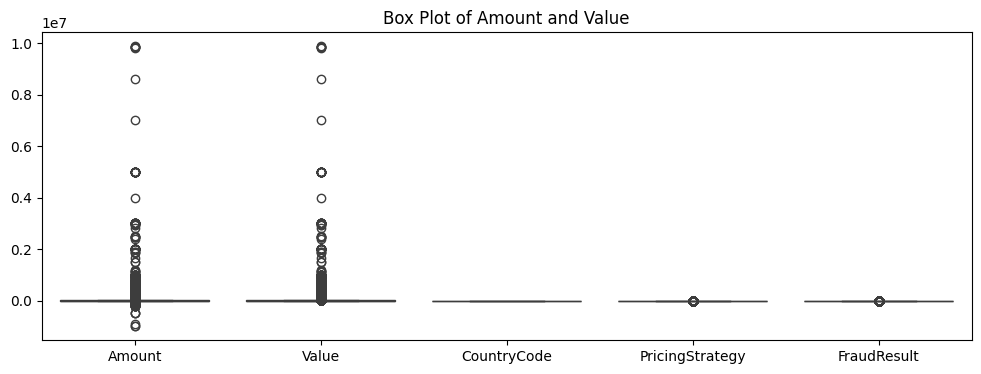

In [28]:
# Box plots for outlier detection
plt.figure(figsize=(12, 4))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plot of Amount and Value')
plt.show()

6. Time series analysis

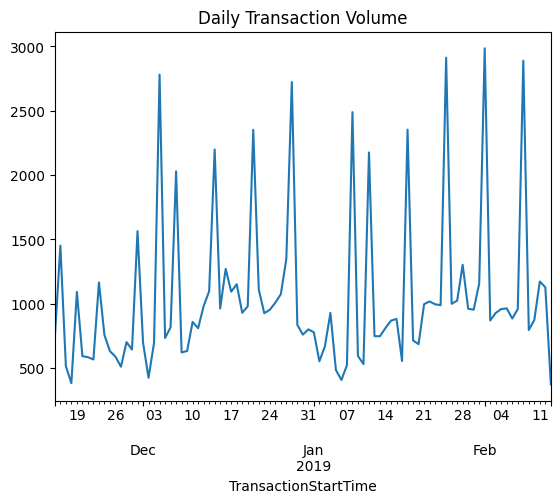

In [12]:
# Convert TransactionStartTime to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Plot transactions over time
df.set_index('TransactionStartTime')['Amount'].resample('D').count().plot()
plt.title('Daily Transaction Volume')
plt.show()